**PRABAL MANHAS 20BCS4513**

PYTHON ANALYSIS FOR CAR PRICES
USING DATASET PREDICTED THE SELLING PRICE OF THE CARS BASED ON THE ANALYSIS OF ENTITIES PRESENT IN MY DATASET 


In [ ]:
#IMPORTING THE DESIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
# LOADING AND READING THE DATASET
cardataset_prabal = pd.read_csv('car data.csv')

In [ ]:
#MAKING USE OF HEAD AND READING FIRST 5 LINES OF DATASET
cardataset_prabal.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# FETCHING THE ROWS AND COLUMNS PRESENT IN OUR DATASET
cardataset_prabal.shape

(301, 9)

**SO OUTPUT CAME = 301 ROWS AND 9 COLUMNS**

In [ ]:
# MAKING USE OF INFO FOR GETTING DATASET DETAILS
cardataset_prabal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# NOW DATA READING AND ANALYSIS IS DONE
# PERFORMING DATA CLEANING AND MERGING OPERATIONS


#CHECKING NULL VALUES IN DATASET
cardataset_prabal.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# CHECKING CATEGORIAL DATA i.e FUEL TYPE SELLER TYPE AND TRANSMISSION
print(cardataset_prabal.Fuel_Type.value_counts())
print(cardataset_prabal.Seller_Type.value_counts())
print(cardataset_prabal.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
# FUEL TYPE COLUMN
cardataset_prabal.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# SELLER TYPE COLUMNS
cardataset_prabal.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# TRANSMISSION COLUMNS
cardataset_prabal.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
# PRINTING THE NEW DECODED RECORDS
cardataset_prabal.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
# SPLIITING THE DATA AND OUR AIM I.E SELLING PRICE

X = cardataset_prabal.drop(['Car_Name','Selling_Price'],axis=1)
Y = cardataset_prabal['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

**PERFORMING LINEAR REGRESSION**

In [ ]:
# NOW DATA CLEANING AND MERGING IS COMPLETE
# BUILDING A LINEAR REGRESSION MODEL
linearregression_prabal = LinearRegression()

In [ ]:
linearregression_prabal.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# PREDICTION OF TRAINING DATA
training_data_prediction = linearregression_prabal.predict(X_train)

In [ ]:
# R SQUADED ERROR
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R SQUADED ERROR ---> ", error_score)

R SQUADED ERROR --->  0.8799451660493711


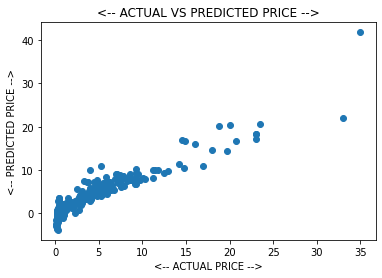

In [ ]:
# PERFORMING PLOTTING OF GRAPHS FOR DATA VISUALISATION USING IMPORTED LIBRARIES

#PLOTTING SCATTER PLOT BETWEEN ACTUAL AND PREDICTED PRICE
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("<-- ACTUAL PRICE -->")
plt.ylabel("<-- PREDICTED PRICE -->")
plt.title("<-- ACTUAL VS PREDICTED PRICE -->")
plt.show()

In [ ]:
# PERFORMING PREDICTION OF TRAINING DATA
test_data_prediction = linearregression_prabal.predict(X_test)

In [ ]:
# ERROR VALUE FOR R

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R SQUADED ERROR --> ", error_score)

R SQUADED ERROR -->  0.8365766715027051


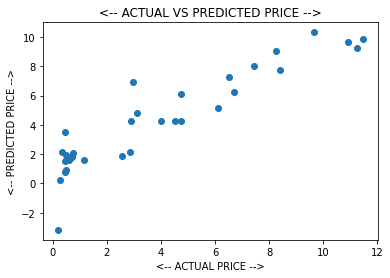

In [ ]:
#PLOTTING SCATTER PLOT BETWEEN ACTUAL AND PREDICTED PRICE
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("<-- ACTUAL PRICE -->")
plt.ylabel("<-- PREDICTED PRICE -->")
plt.title("<-- ACTUAL VS PREDICTED PRICE -->")
plt.show()

**NOW PERFORMING LASSO REGRESSION**

In [ ]:
Lasso()

Lasso()

In [ ]:
# PERFORMING LASSO REGRESSION 
#FIRST LOADING MY LINEAR REGRESSION MODEL

lasso_regression = Lasso()

In [ ]:
lasso_regression.fit(X_train,Y_train)

Lasso()

In [ ]:
# NOW PERFORMING EVALUATION FOR EACH MODEL
# PREDICTING THE TRAINING DATA
training_data_prediction = lasso_regression.predict(X_train)

In [ ]:
# R SQUADED ERROR VALUE
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R SQUADED ERROR ->> ", error_score)

R SQUADED ERROR ->>  0.8427856123435794


**PERFORMING DATA VISUALTION AND PLOTTING SCATTER PLOTS BETWEEN ACTUAL PRICE AND PREDICTED PRICE**

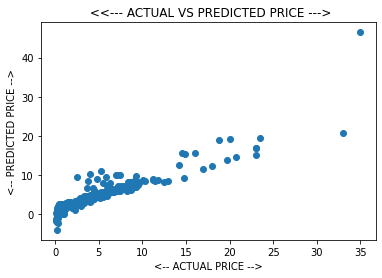

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("<-- ACTUAL PRICE -->")
plt.ylabel("<-- PREDICTED PRICE -->")
plt.title(" <<--- ACTUAL VS PREDICTED PRICE --->")
plt.show()

In [ ]:
test_data_prediction = lasso_regression.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R SQUADED ERROR --> ", error_score)

R SQUADED ERROR -->  0.8709167941173195


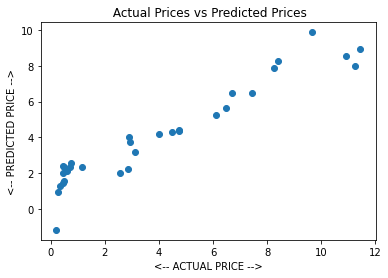

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("<-- ACTUAL PRICE -->")
plt.ylabel("<-- PREDICTED PRICE -->")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()